In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: INTC
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


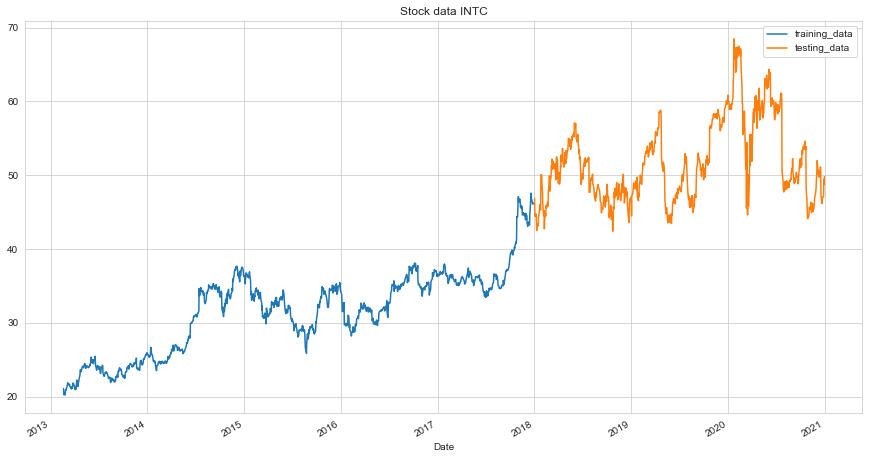

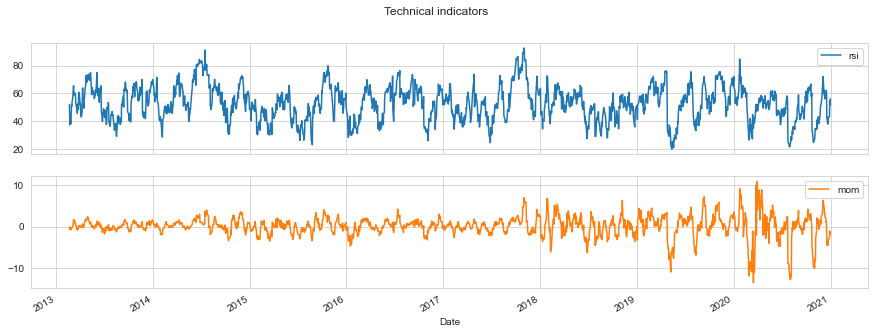

In [2]:
stock_name = 'intc'.upper()
industry = 'Technology'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1431.63, duration: 0:00:00.270584
episode: 2/2000, episode end value: 1463.74, duration: 0:00:00.250053
episode: 3/2000, episode end value: 1416.06, duration: 0:00:00.260080
episode: 4/2000, episode end value: 1405.74, duration: 0:00:00.277589
episode: 5/2000, episode end value: 1401.34, duration: 0:00:00.330249
episode: 6/2000, episode end value: 1400.48, duration: 0:00:00.284063
episode: 7/2000, episode end value: 1402.94, duration: 0:00:00.272824
episode: 8/2000, episode end value: 1408.33, duration: 0:00:00.272369
episode: 9/2000, episode end value: 1400.36, duration: 0:00:00.355100
episode: 10/2000, episode end value: 1403.06, duration: 0:00:00.334491
episode: 11/2000, episode end value: 1412.62, duration: 0:00:00.318070
episode: 12/2000, episode end value: 1406.61, duration: 0:00:00.330241
episode: 13/2000, episode end value: 1408.58, duration: 0:00:00.286984
episode: 14/2000, episode end value: 1409.74, duration: 0:00:00.291066
episode: 15/200

episode: 117/2000, episode end value: 1396.23, duration: 0:00:00.540905
episode: 118/2000, episode end value: 1406.47, duration: 0:00:00.455269
episode: 119/2000, episode end value: 1407.59, duration: 0:00:00.486328
episode: 120/2000, episode end value: 1378.65, duration: 0:00:00.428373
episode: 121/2000, episode end value: 1400.62, duration: 0:00:00.434706
episode: 122/2000, episode end value: 1383.99, duration: 0:00:00.541119
episode: 123/2000, episode end value: 1370.83, duration: 0:00:00.440166
episode: 124/2000, episode end value: 1414.12, duration: 0:00:00.497488
episode: 125/2000, episode end value: 1410.48, duration: 0:00:00.397363
episode: 126/2000, episode end value: 1407.84, duration: 0:00:00.494185
episode: 127/2000, episode end value: 1413.78, duration: 0:00:00.493717
episode: 128/2000, episode end value: 1417.24, duration: 0:00:00.452794
episode: 129/2000, episode end value: 1409.78, duration: 0:00:00.413877
episode: 130/2000, episode end value: 1412.58, duration: 0:00:00

episode: 231/2000, episode end value: 1444.55, duration: 0:00:00.437906
episode: 232/2000, episode end value: 1453.55, duration: 0:00:00.411376
episode: 233/2000, episode end value: 1388.89, duration: 0:00:00.314240
episode: 234/2000, episode end value: 1476.85, duration: 0:00:00.423684
episode: 235/2000, episode end value: 1466.41, duration: 0:00:00.450932
episode: 236/2000, episode end value: 1492.93, duration: 0:00:00.410103
episode: 237/2000, episode end value: 1432.88, duration: 0:00:00.416944
episode: 238/2000, episode end value: 1453.22, duration: 0:00:00.476980
episode: 239/2000, episode end value: 1461.41, duration: 0:00:00.353918
episode: 240/2000, episode end value: 1478.96, duration: 0:00:00.347577
episode: 241/2000, episode end value: 1408.18, duration: 0:00:00.344413
episode: 242/2000, episode end value: 1453.46, duration: 0:00:00.407610
episode: 243/2000, episode end value: 1459.63, duration: 0:00:00.349989
episode: 244/2000, episode end value: 1450.69, duration: 0:00:00

episode: 345/2000, episode end value: 1404.40, duration: 0:00:00.469254
episode: 346/2000, episode end value: 1412.01, duration: 0:00:00.429274
episode: 347/2000, episode end value: 1406.06, duration: 0:00:00.378431
episode: 348/2000, episode end value: 1415.24, duration: 0:00:00.395052
episode: 349/2000, episode end value: 1405.69, duration: 0:00:00.398378
episode: 350/2000, episode end value: 1401.48, duration: 0:00:00.353351
episode: 351/2000, episode end value: 1405.49, duration: 0:00:00.431949
episode: 352/2000, episode end value: 1404.20, duration: 0:00:00.449574
episode: 353/2000, episode end value: 1409.01, duration: 0:00:00.496020
episode: 354/2000, episode end value: 1403.44, duration: 0:00:00.420025
episode: 355/2000, episode end value: 1407.68, duration: 0:00:00.514664
episode: 356/2000, episode end value: 1405.70, duration: 0:00:00.482323
episode: 357/2000, episode end value: 1405.31, duration: 0:00:00.424502
episode: 358/2000, episode end value: 1402.47, duration: 0:00:00

episode: 459/2000, episode end value: 1440.26, duration: 0:00:00.326528
episode: 460/2000, episode end value: 1461.57, duration: 0:00:00.427332
episode: 461/2000, episode end value: 1452.44, duration: 0:00:00.375643
episode: 462/2000, episode end value: 1449.63, duration: 0:00:00.331293
episode: 463/2000, episode end value: 1444.15, duration: 0:00:00.395865
episode: 464/2000, episode end value: 1443.35, duration: 0:00:00.355105
episode: 465/2000, episode end value: 1399.18, duration: 0:00:00.348359
episode: 466/2000, episode end value: 1401.34, duration: 0:00:00.468615
episode: 467/2000, episode end value: 1415.01, duration: 0:00:00.428672
episode: 468/2000, episode end value: 1449.59, duration: 0:00:00.384894
episode: 469/2000, episode end value: 1439.77, duration: 0:00:00.377381
episode: 470/2000, episode end value: 1447.44, duration: 0:00:00.349179
episode: 471/2000, episode end value: 1449.57, duration: 0:00:00.363379
episode: 472/2000, episode end value: 1340.50, duration: 0:00:00

episode: 573/2000, episode end value: 1385.23, duration: 0:00:00.333178
episode: 574/2000, episode end value: 1386.88, duration: 0:00:00.294670
episode: 575/2000, episode end value: 1444.48, duration: 0:00:00.351194
episode: 576/2000, episode end value: 1421.79, duration: 0:00:00.349567
episode: 577/2000, episode end value: 1385.87, duration: 0:00:00.356587
episode: 578/2000, episode end value: 1386.06, duration: 0:00:00.341477
episode: 579/2000, episode end value: 1400.15, duration: 0:00:00.315853
episode: 580/2000, episode end value: 1385.29, duration: 0:00:00.393379
episode: 581/2000, episode end value: 1378.04, duration: 0:00:00.408372
episode: 582/2000, episode end value: 1360.93, duration: 0:00:00.387084
episode: 583/2000, episode end value: 1374.02, duration: 0:00:00.321071
episode: 584/2000, episode end value: 1425.56, duration: 0:00:00.307070
episode: 585/2000, episode end value: 1421.98, duration: 0:00:00.407096
episode: 586/2000, episode end value: 1404.64, duration: 0:00:00

episode: 687/2000, episode end value: 1363.35, duration: 0:00:00.347865
episode: 688/2000, episode end value: 1373.96, duration: 0:00:00.324288
episode: 689/2000, episode end value: 1391.61, duration: 0:00:00.248687
episode: 690/2000, episode end value: 1431.99, duration: 0:00:00.302196
episode: 691/2000, episode end value: 1387.59, duration: 0:00:00.332658
episode: 692/2000, episode end value: 1408.82, duration: 0:00:00.316734
episode: 693/2000, episode end value: 1399.65, duration: 0:00:00.348774
episode: 694/2000, episode end value: 1424.10, duration: 0:00:00.296120
episode: 695/2000, episode end value: 1394.61, duration: 0:00:00.392372
episode: 696/2000, episode end value: 1380.62, duration: 0:00:00.373130
episode: 697/2000, episode end value: 1383.89, duration: 0:00:00.311302
episode: 698/2000, episode end value: 1402.81, duration: 0:00:00.310762
episode: 699/2000, episode end value: 1388.91, duration: 0:00:00.270659
episode: 700/2000, episode end value: 1361.94, duration: 0:00:00

episode: 801/2000, episode end value: 1377.77, duration: 0:00:00.316007
episode: 802/2000, episode end value: 1381.59, duration: 0:00:00.266612
episode: 803/2000, episode end value: 1372.45, duration: 0:00:00.344013
episode: 804/2000, episode end value: 1383.92, duration: 0:00:00.341654
episode: 805/2000, episode end value: 1381.37, duration: 0:00:00.375126
episode: 806/2000, episode end value: 1383.28, duration: 0:00:00.264587
episode: 807/2000, episode end value: 1376.39, duration: 0:00:00.298035
episode: 808/2000, episode end value: 1373.66, duration: 0:00:00.307778
episode: 809/2000, episode end value: 1385.43, duration: 0:00:00.310078
episode: 810/2000, episode end value: 1384.81, duration: 0:00:00.368338
episode: 811/2000, episode end value: 1390.46, duration: 0:00:00.302763
episode: 812/2000, episode end value: 1385.26, duration: 0:00:00.299729
episode: 813/2000, episode end value: 1375.36, duration: 0:00:00.384948
episode: 814/2000, episode end value: 1393.37, duration: 0:00:00

episode: 915/2000, episode end value: 1385.79, duration: 0:00:00.395821
episode: 916/2000, episode end value: 1377.98, duration: 0:00:00.328621
episode: 917/2000, episode end value: 1377.00, duration: 0:00:00.362762
episode: 918/2000, episode end value: 1368.87, duration: 0:00:00.393617
episode: 919/2000, episode end value: 1374.26, duration: 0:00:00.389167
episode: 920/2000, episode end value: 1412.47, duration: 0:00:00.313310
episode: 921/2000, episode end value: 1411.75, duration: 0:00:00.333310
episode: 922/2000, episode end value: 1399.14, duration: 0:00:00.406268
episode: 923/2000, episode end value: 1377.65, duration: 0:00:00.314509
episode: 924/2000, episode end value: 1386.57, duration: 0:00:00.393680
episode: 925/2000, episode end value: 1384.06, duration: 0:00:00.325263
episode: 926/2000, episode end value: 1388.06, duration: 0:00:00.341212
episode: 927/2000, episode end value: 1376.26, duration: 0:00:00.329297
episode: 928/2000, episode end value: 1417.03, duration: 0:00:00

episode: 1029/2000, episode end value: 1364.52, duration: 0:00:00.341749
episode: 1030/2000, episode end value: 1360.41, duration: 0:00:00.323317
episode: 1031/2000, episode end value: 1360.70, duration: 0:00:00.289046
episode: 1032/2000, episode end value: 1360.29, duration: 0:00:00.283094
episode: 1033/2000, episode end value: 1344.99, duration: 0:00:00.303098
episode: 1034/2000, episode end value: 1368.40, duration: 0:00:00.280101
episode: 1035/2000, episode end value: 1377.62, duration: 0:00:00.343126
episode: 1036/2000, episode end value: 1376.44, duration: 0:00:00.299113
episode: 1037/2000, episode end value: 1376.06, duration: 0:00:00.382273
episode: 1038/2000, episode end value: 1377.31, duration: 0:00:00.267991
episode: 1039/2000, episode end value: 1379.85, duration: 0:00:00.329227
episode: 1040/2000, episode end value: 1409.10, duration: 0:00:00.387223
episode: 1041/2000, episode end value: 1387.50, duration: 0:00:00.396833
episode: 1042/2000, episode end value: 1378.52, dur

episode: 1142/2000, episode end value: 1360.11, duration: 0:00:00.391790
episode: 1143/2000, episode end value: 1362.27, duration: 0:00:00.358923
episode: 1144/2000, episode end value: 1370.56, duration: 0:00:00.330231
episode: 1145/2000, episode end value: 1398.22, duration: 0:00:00.322577
episode: 1146/2000, episode end value: 1379.29, duration: 0:00:00.281242
episode: 1147/2000, episode end value: 1375.71, duration: 0:00:00.445057
episode: 1148/2000, episode end value: 1367.67, duration: 0:00:00.297934
episode: 1149/2000, episode end value: 1364.26, duration: 0:00:00.303721
episode: 1150/2000, episode end value: 1362.68, duration: 0:00:00.399721
episode: 1151/2000, episode end value: 1362.33, duration: 0:00:00.312194
episode: 1152/2000, episode end value: 1381.63, duration: 0:00:00.307193
episode: 1153/2000, episode end value: 1392.91, duration: 0:00:00.293624
episode: 1154/2000, episode end value: 1383.72, duration: 0:00:00.319652
episode: 1155/2000, episode end value: 1376.59, dur

episode: 1255/2000, episode end value: 1385.26, duration: 0:00:00.346404
episode: 1256/2000, episode end value: 1378.34, duration: 0:00:00.356717
episode: 1257/2000, episode end value: 1373.92, duration: 0:00:00.308593
episode: 1258/2000, episode end value: 1371.14, duration: 0:00:00.395553
episode: 1259/2000, episode end value: 1373.67, duration: 0:00:00.329265
episode: 1260/2000, episode end value: 1377.22, duration: 0:00:00.331946
episode: 1261/2000, episode end value: 1397.12, duration: 0:00:00.294740
episode: 1262/2000, episode end value: 1395.45, duration: 0:00:00.307121
episode: 1263/2000, episode end value: 1387.51, duration: 0:00:00.306237
episode: 1264/2000, episode end value: 1386.53, duration: 0:00:00.310915
episode: 1265/2000, episode end value: 1374.32, duration: 0:00:00.299180
episode: 1266/2000, episode end value: 1361.24, duration: 0:00:00.369376
episode: 1267/2000, episode end value: 1361.62, duration: 0:00:00.394418
episode: 1268/2000, episode end value: 1363.64, dur

episode: 1368/2000, episode end value: 1388.02, duration: 0:00:00.277276
episode: 1369/2000, episode end value: 1411.53, duration: 0:00:00.301621
episode: 1370/2000, episode end value: 1393.84, duration: 0:00:00.323295
episode: 1371/2000, episode end value: 1405.17, duration: 0:00:00.365729
episode: 1372/2000, episode end value: 1397.12, duration: 0:00:00.364909
episode: 1373/2000, episode end value: 1405.97, duration: 0:00:00.284619
episode: 1374/2000, episode end value: 1403.30, duration: 0:00:00.309710
episode: 1375/2000, episode end value: 1393.27, duration: 0:00:00.349253
episode: 1376/2000, episode end value: 1368.13, duration: 0:00:00.326784
episode: 1377/2000, episode end value: 1366.05, duration: 0:00:00.307966
episode: 1378/2000, episode end value: 1349.91, duration: 0:00:00.327425
episode: 1379/2000, episode end value: 1365.13, duration: 0:00:00.307917
episode: 1380/2000, episode end value: 1373.53, duration: 0:00:00.338520
episode: 1381/2000, episode end value: 1431.42, dur

episode: 1481/2000, episode end value: 1385.21, duration: 0:00:00.328098
episode: 1482/2000, episode end value: 1399.27, duration: 0:00:00.408584
episode: 1483/2000, episode end value: 1392.76, duration: 0:00:00.417251
episode: 1484/2000, episode end value: 1411.85, duration: 0:00:00.329646
episode: 1485/2000, episode end value: 1402.66, duration: 0:00:00.305119
episode: 1486/2000, episode end value: 1382.93, duration: 0:00:00.350149
episode: 1487/2000, episode end value: 1389.52, duration: 0:00:00.288838
episode: 1488/2000, episode end value: 1398.03, duration: 0:00:00.370716
episode: 1489/2000, episode end value: 1403.56, duration: 0:00:00.373851
episode: 1490/2000, episode end value: 1389.82, duration: 0:00:00.348569
episode: 1491/2000, episode end value: 1374.77, duration: 0:00:00.328811
episode: 1492/2000, episode end value: 1374.61, duration: 0:00:00.324053
episode: 1493/2000, episode end value: 1356.58, duration: 0:00:00.274563
episode: 1494/2000, episode end value: 1356.13, dur

episode: 1594/2000, episode end value: 1378.89, duration: 0:00:00.306760
episode: 1595/2000, episode end value: 1373.50, duration: 0:00:00.419222
episode: 1596/2000, episode end value: 1368.04, duration: 0:00:00.333250
episode: 1597/2000, episode end value: 1380.81, duration: 0:00:00.302677
episode: 1598/2000, episode end value: 1364.02, duration: 0:00:00.416101
episode: 1599/2000, episode end value: 1378.40, duration: 0:00:00.332943
episode: 1600/2000, episode end value: 1380.39, duration: 0:00:00.331821
episode: 1601/2000, episode end value: 1371.66, duration: 0:00:00.330985
episode: 1602/2000, episode end value: 1384.61, duration: 0:00:00.310838
episode: 1603/2000, episode end value: 1374.36, duration: 0:00:00.309269
episode: 1604/2000, episode end value: 1361.49, duration: 0:00:00.291221
episode: 1605/2000, episode end value: 1370.01, duration: 0:00:00.308480
episode: 1606/2000, episode end value: 1369.71, duration: 0:00:00.363129
episode: 1607/2000, episode end value: 1386.08, dur

episode: 1707/2000, episode end value: 1363.28, duration: 0:00:00.370025
episode: 1708/2000, episode end value: 1371.65, duration: 0:00:00.312864
episode: 1709/2000, episode end value: 1381.85, duration: 0:00:00.269765
episode: 1710/2000, episode end value: 1378.95, duration: 0:00:00.263296
episode: 1711/2000, episode end value: 1401.37, duration: 0:00:00.372993
episode: 1712/2000, episode end value: 1392.07, duration: 0:00:00.335527
episode: 1713/2000, episode end value: 1380.07, duration: 0:00:00.307411
episode: 1714/2000, episode end value: 1373.05, duration: 0:00:00.323431
episode: 1715/2000, episode end value: 1369.03, duration: 0:00:00.325455
episode: 1716/2000, episode end value: 1373.94, duration: 0:00:00.308268
episode: 1717/2000, episode end value: 1358.59, duration: 0:00:00.337319
episode: 1718/2000, episode end value: 1351.75, duration: 0:00:00.285908
episode: 1719/2000, episode end value: 1381.22, duration: 0:00:00.380430
episode: 1720/2000, episode end value: 1393.70, dur

episode: 1820/2000, episode end value: 1367.06, duration: 0:00:00.274718
episode: 1821/2000, episode end value: 1389.58, duration: 0:00:00.379962
episode: 1822/2000, episode end value: 1380.17, duration: 0:00:00.284138
episode: 1823/2000, episode end value: 1383.19, duration: 0:00:00.389566
episode: 1824/2000, episode end value: 1389.43, duration: 0:00:00.346309
episode: 1825/2000, episode end value: 1358.42, duration: 0:00:00.316361
episode: 1826/2000, episode end value: 1373.88, duration: 0:00:00.355842
episode: 1827/2000, episode end value: 1353.15, duration: 0:00:00.284854
episode: 1828/2000, episode end value: 1352.47, duration: 0:00:00.322401
episode: 1829/2000, episode end value: 1354.91, duration: 0:00:00.321124
episode: 1830/2000, episode end value: 1363.27, duration: 0:00:00.290036
episode: 1831/2000, episode end value: 1404.75, duration: 0:00:00.341689
episode: 1832/2000, episode end value: 1378.80, duration: 0:00:00.286295
episode: 1833/2000, episode end value: 1400.53, dur

episode: 1933/2000, episode end value: 1382.79, duration: 0:00:00.340923
episode: 1934/2000, episode end value: 1387.18, duration: 0:00:00.278445
episode: 1935/2000, episode end value: 1375.25, duration: 0:00:00.347089
episode: 1936/2000, episode end value: 1378.92, duration: 0:00:00.343838
episode: 1937/2000, episode end value: 1361.84, duration: 0:00:00.321821
episode: 1938/2000, episode end value: 1358.34, duration: 0:00:00.294483
episode: 1939/2000, episode end value: 1356.37, duration: 0:00:00.338867
episode: 1940/2000, episode end value: 1359.39, duration: 0:00:00.354054
episode: 1941/2000, episode end value: 1369.16, duration: 0:00:00.293026
episode: 1942/2000, episode end value: 1381.22, duration: 0:00:00.328098
episode: 1943/2000, episode end value: 1378.35, duration: 0:00:00.275732
episode: 1944/2000, episode end value: 1378.96, duration: 0:00:00.351491
episode: 1945/2000, episode end value: 1411.84, duration: 0:00:00.351818
episode: 1946/2000, episode end value: 1397.17, dur

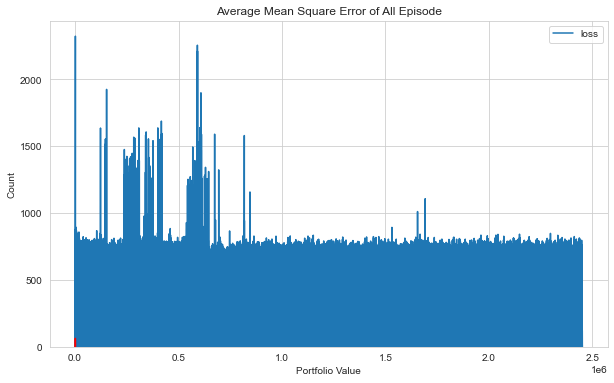

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

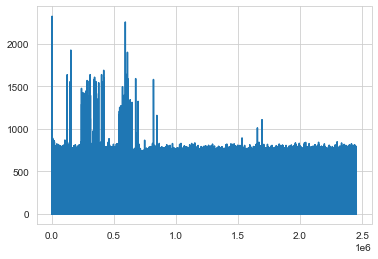

In [5]:
plt.plot(agent.model.losses)

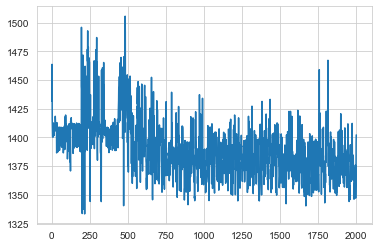

In [6]:
plt.plot(portfolio_value)

episode end value: 1312.31, duration: 0:00:00.269095
Sell: 386 times, Buy: 364 times


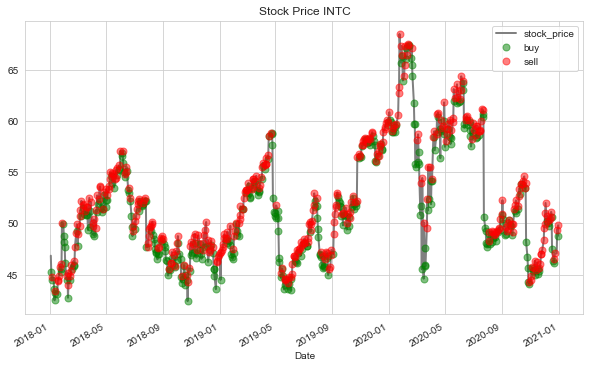

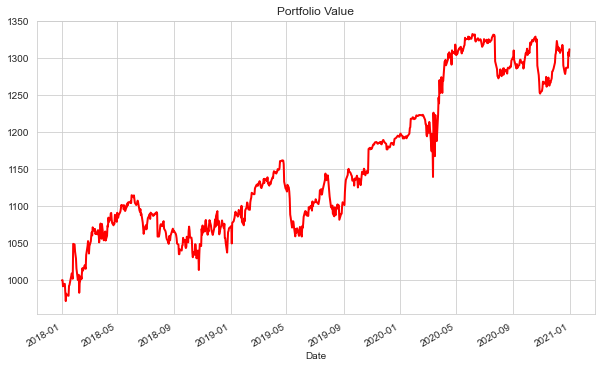

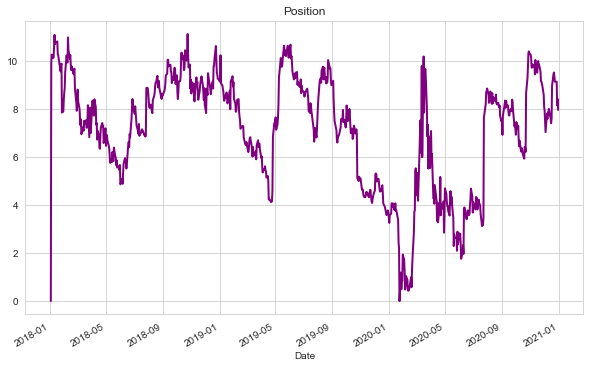

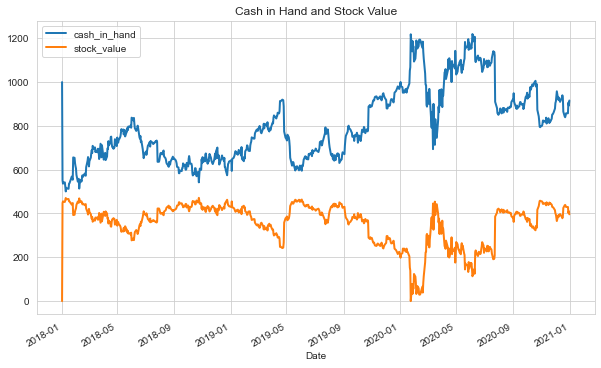

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: INTC
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 9.48 %
Volatility: 0.1280
shape ratio: 0.6548
Maximun drawdown: -9.07 %
Calmar ratio: 1.0452
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 2.07 %
Volatility (benchmark): 0.3972
shape ratio: 0.0244
Maximun drawdown: -35.58 %
Calmar ratio (benchmark): 0.0582


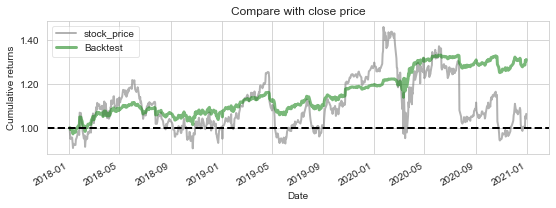

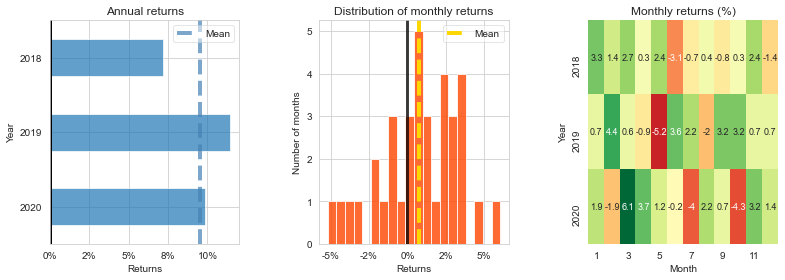

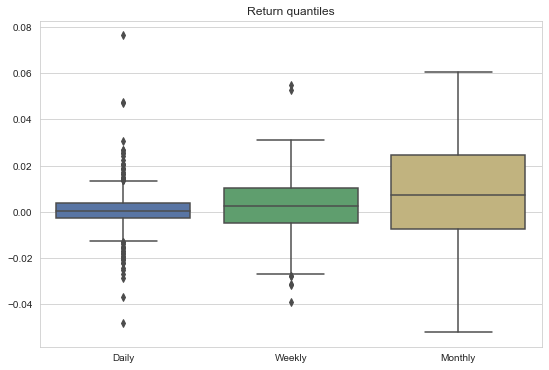

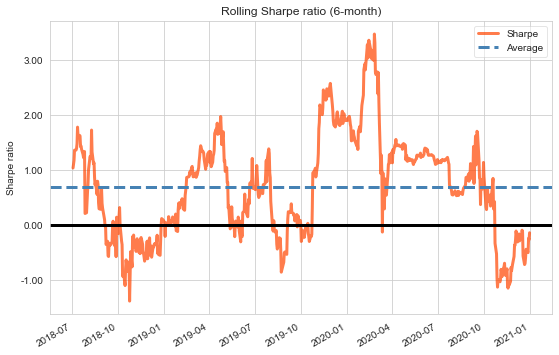

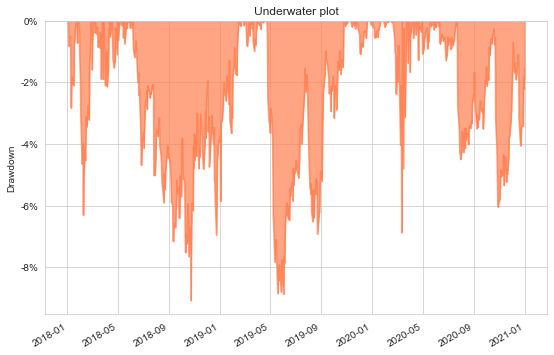

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')